# Engine crash recognition Model

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Downloads/data.csv")
df.head()

,id,cycle,p00,p01,p02,p03,p04,p05,p06,p07,...,p13,p14,p15,p16,p17,p18,p19,p20,s1,s2
0,1,1,518.67,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,...,23.4190,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,-0.0007,-0.0004
1,1,2,518.67,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,...,23.4236,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,0.0019,-0.0003
2,1,3,518.67,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,...,23.3442,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,-0.0043,0.0003
3,1,4,518.67,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,...,23.3739,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,0.0007,0.0000
4,1,5,518.67,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,...,23.4044,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,-0.0019,-0.0002


In [3]:
df.shape

(16138, 25)

In [4]:
for col in ['p00','p01','p07','p09','p10','p16']:
   print(df[col].value_counts())

518.67    16138
Name: p00, dtype: int64
1.3    16138
Name: p01, dtype: int64
0.03    16138
Name: p07, dtype: int64
2388    16138
Name: p09, dtype: int64
100    16138
Name: p10, dtype: int64
14.62    16138
Name: p16, dtype: int64


#### *Values of features: ['p00','p01','p07','p09','p10','p16'] are the same for all mesurements --> we can drop these columns*

In [5]:
df = df.drop(['p00','p01','p07','p09','p10','p16'],axis=1)

In [6]:
df.head(3)

,id,cycle,p02,p03,p04,p05,p06,p08,p11,p12,p13,p14,p15,p17,p18,p19,p20,s1,s2
0,1,1,47.47,521.66,2388.02,8138.62,8.4195,392,641.82,39.06,23.4190,1589.70,1400.60,21.61,554.36,2388.06,9046.19,-0.0007,-0.0004
1,1,2,47.49,522.28,2388.07,8131.49,8.4318,392,642.15,39.00,23.4236,1591.82,1403.14,21.61,553.75,2388.04,9044.07,0.0019,-0.0003
2,1,3,47.27,522.42,2388.03,8133.23,8.4178,390,642.35,38.95,23.3442,1587.99,1404.20,21.61,554.26,2388.08,9052.94,-0.0043,0.0003


#### *Lets see correlations between features: ['p02','p03','p04','p05','p06','p08','p11','p12','p13','p14','p15','p17','p18','p19','p20','s1','s2']*

In [7]:
df.iloc[:,2:].corr()

,p02,p03,p04,p05,p06,p08,p11,p12,p13,p14,p15,p17,p18,p19,p20,s1,s2
p02,1.000000,-0.846720,0.779349,0.159484,0.781569,0.722599,0.742791,-0.772874,-0.774019,0.696060,0.830589,0.167116,-0.823199,0.781557,0.267509,0.011293,0.011275
p03,-0.846720,1.000000,-0.788536,-0.093242,-0.766084,-0.702045,-0.724570,0.753004,0.756030,-0.679317,-0.816221,-0.161414,0.812561,-0.786431,-0.201839,0.000100,-0.012424
p04,0.779349,-0.788536,1.000000,-0.155069,0.695281,0.626149,0.661052,-0.684216,-0.687772,0.598884,0.743250,0.162102,-0.762284,0.829568,-0.046813,0.000885,0.019077
p05,0.159484,-0.093242,-0.155069,1.000000,0.190585,0.247678,0.180546,-0.184223,-0.194191,0.238409,0.187843,-0.001309,-0.103844,-0.156813,0.965722,-0.003548,-0.012924
p06,0.781569,-0.766084,0.695281,0.190585,1.000000,0.669778,0.677273,-0.707716,-0.704446,0.642290,0.755409,0.153216,-0.746073,0.697645,0.287152,0.002999,0.011039
p08,0.722599,-0.702045,0.626149,0.247678,0.669778,1.000000,0.632299,-0.653772,-0.659985,0.603461,0.704456,0.137780,-0.693755,0.625700,0.334113,0.002952,0.015772
p11,0.742791,-0.724570,0.661052,0.180546,0.677273,0.632299,1.000000,-0.665418,-0.671258,0.604394,0.717264,0.137679,-0.702290,0.662006,0.271283,0.005720,0.006672
p12,-0.772874,0.753004,-0.684216,-0.184223,-0.707716,-0.653772,-0.665418,1.000000,0.695022,-0.626487,-0.749240,-0.146111,0.734549,-0.685502,-0.278541,-0.003948,-0.010976
p13,-0.774019,0.756030,-0.687772,-0.194191,-0.704446,-0.659985,-0.671258,0.695022,1.000000,-0.637922,-0.746235,-0.141956,0.738524,-0.686320,-0.291793,-0.015010,-0.012094
p14,0.696060,-0.679317,0.598884,0.238409,0.642290,0.603461,0.604394,-0.626487,-0.637922,1.000000,0.680636,0.121884,-0.663853,0.598641,0.321648,-0.009492,0.010532


#### *From the table above we can conclude that all features except: ['p05','p17','s1','s2','p20'] have high correlation with 'p02', but we drop 'p20', as it correlates with 'p05'* 

In [8]:
df_1 = df[['id','cycle','p02','p05','p17','s1','s2']]
df_1.describe()

,id,cycle,p02,p05,p17,s1,s2
count,16138.000000,16138.000000,16138.000000,16138.000000,16138.000000,16138.000000,1.613800e+04
mean,40.707894,105.548147,47.544263,8143.933458,21.609795,0.000010,6.196555e-08
std,23.395354,65.915295,0.267422,19.731349,0.001417,0.002188,2.939096e-04
min,1.000000,1.000000,46.860000,8099.940000,21.600000,-0.008600,-6.000000e-04
25%,20.000000,51.000000,47.350000,8132.830000,21.610000,-0.001400,-3.000000e-04
50%,42.000000,101.000000,47.520000,8140.750000,21.610000,0.000000,0.000000e+00
75%,61.000000,153.000000,47.710000,8148.817500,21.610000,0.001500,3.000000e-04
max,80.000000,362.000000,48.530000,8293.720000,21.610000,0.008700,6.000000e-04


In [9]:
# p17 has only two distinct values
df_1['p17'].value_counts()

21.61    15807
21.60      331
Name: p17, dtype: int64

#### *Lets determine max cycle for each engine* 

In [10]:
max_cycle = df_1.groupby('id')['cycle'].max().reset_index().sort_values(by=['cycle'],ascending=False)
max_cycle

,id,cycle
68,69,362
66,67,313
1,2,287
63,64,283
16,17,276
...,...,...
23,24,147
57,58,147
69,70,137
56,57,137


#### *Lets construct a dataframe "data" from columns ['id','cycle','p02','p05','p17','s1','s2'] and column, indicating was it a last cycle or not (only 2 distonct values: 1 - last cycle, 0 - not a last cycle)*

In [11]:
df2 = df_1.merge(max_cycle,how='left',left_on='id',right_on='id')
outcome = pd.DataFrame({'outcome':(df2['cycle_x']==df2['cycle_y']).astype('int')})
data = pd.concat([df_1,outcome],axis=1)
data.shape

(16138, 8)

In [12]:
data.outcome.value_counts()

0    16058
1       80
Name: outcome, dtype: int64

#### *Ratio between last cycle before crash and regular cycles is approx. 1 : 201  ( measurements of last cycle before crash take appr. 0,5 % from all measurements )* 

In [13]:
# devide data into 2 classes by the outcome, we will use it for futher analysis
data1 = data[data['outcome']==0]
data2 = data[data['outcome']==1]

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

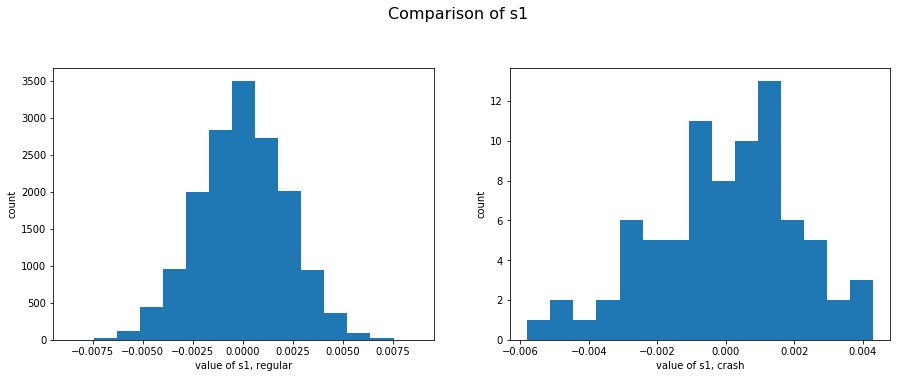

In [15]:
fig,gr = plt.subplots(1,2,figsize=(15,5))
gr[0].hist(data1['s1'],bins=15)
gr[0].set(xlabel='value of s1, regular',ylabel='count')
gr[1].hist(data2['s1'],bins=15)
gr[1].set(xlabel='value of s1, crash',ylabel='count')
plt.suptitle('Comparison of s1', y=1.05, size=16)
plt.show()

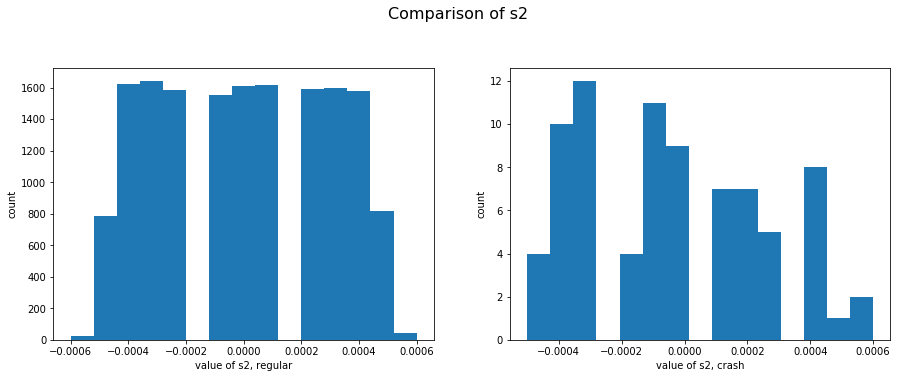

In [16]:
fig,gr = plt.subplots(1,2,figsize=(15,5))
gr[0].hist(data1['s2'],bins=15)
gr[0].set(xlabel='value of s2, regular',ylabel='count')
gr[1].hist(data2['s2'],bins=15)
gr[1].set(xlabel='value of s2, crash',ylabel='count')
plt.suptitle('Comparison of s2', y=1.05, size=16)
plt.show()

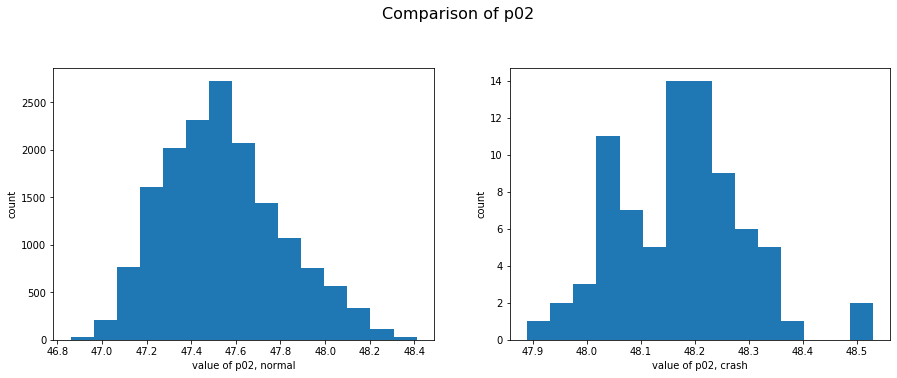

In [17]:
fig,gr = plt.subplots(1,2,figsize=(15,5))
gr[0].hist(data1['p02'],bins=15)
gr[0].set(xlabel='value of p02, normal',ylabel='count')
gr[1].hist(data2['p02'],bins=15)
gr[1].set(xlabel='value of p02, crash',ylabel='count')
plt.suptitle('Comparison of p02', y=1.05, size=16)
plt.show()

In [18]:
features = ['cycle','p02','p05','p17','s1','s2']

In [19]:
data1['p17'].value_counts()

21.61    15727
21.60      331
Name: p17, dtype: int64

In [20]:
data2['p17'].value_counts()

21.61    80
Name: p17, dtype: int64

#### *Mean, max, min for each class*

In [21]:
data.groupby('outcome')[features].mean()

,cycle,p02,p05,p17,s1,s2
outcome,,,,,,
0,105.069,47.541138,8143.802079,21.609794,0.000010,2.490970e-07
1,201.725,48.171500,8170.304500,21.610000,-0.000048,-3.750000e-05


In [22]:
data.groupby('outcome')[features].max()

,cycle,p02,p05,p17,s1,s2
outcome,,,,,,
0,361,48.41,8288.26,21.61,0.0087,0.0006
1,362,48.53,8293.72,21.61,0.0043,0.0006


In [23]:
data.groupby('outcome')[features].min()

,cycle,p02,p05,p17,s1,s2
outcome,,,,,,
0,1,46.86,8099.94,21.60,-0.0086,-0.0006
1,128,47.89,8102.82,21.61,-0.0058,-0.0005


In [24]:
# devide into train, validation, test datasets
from sklearn.model_selection import train_test_split

X = np.array(data[features])
Y = np.array(data.outcome)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20)
print('Train data: ',X_train.shape,Y_train.shape,'Test data: ',X_test.shape,Y_test.shape)

Train data:  (12910, 6) (12910,) Test data:  (3228, 6) (3228,)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import auc

In [26]:
weights = [{0:1,1:1},{0:1,1:20}, {0:1,1:50},{0:1,1:70}, {0:1,1:100}, {0:1,1:120}, {0:1,1:150}, 
{0:1,1:170}, {0:1,1:200}, {0:1,1:220} ]

## Logistic regression

In [27]:
grid = GridSearchCV(LogisticRegression(),{"class_weight": weights},scoring="roc_auc", cv=5, refit=True)
grid.fit(X_train,Y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.9685659059420804 with param: {'class_weight': {0: 1, 1: 200}}


In [28]:
reg = LogisticRegression(class_weight={0:1,1:200})
reg.fit(X_train,Y_train)
# define evaluation procedure


LogisticRegression(C=1.0, class_weight={0: 1, 1: 200}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
Y_pred = reg.predict(X_test)

In [30]:
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy_score: ',accuracy_score(Y_test, Y_pred))

[[2962  253]
 [   0   13]]
Accuracy_score:  0.9216232961586122


In [31]:
print(f'Area Under Curve: {roc_auc_score(Y_test, Y_pred)}')
print(f'Recall score: {recall_score(Y_test,Y_pred)}')
print(f'Precision score: {precision_score(Y_test,Y_pred)}')

Area Under Curve: 0.9606531881804043
Recall score: 1.0
Precision score: 0.04887218045112782


In [32]:
pos_probs = reg.predict_proba(X_test)
pos_probs = pos_probs[:,1]

In [33]:
precision, recall,_ = precision_recall_curve(Y_test, pos_probs)

In [34]:
auc_score = auc(recall, precision)
print('Precision_recall_score: ',auc_score)

Precision_recall_score:  0.2744479321692761


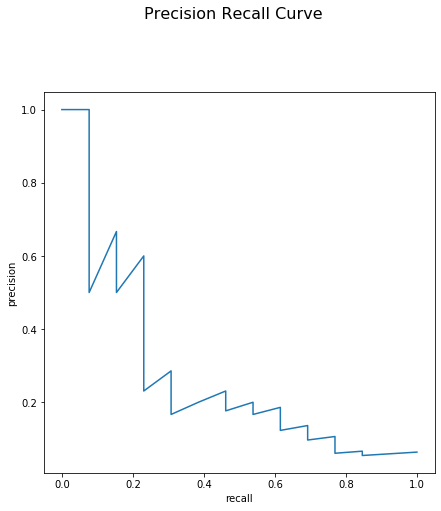

In [35]:
fig,gr = plt.subplots(figsize=(7,7))
gr.plot(recall,precision)
gr.set(xlabel='recall',ylabel='precision')
plt.suptitle('Precision Recall Curve', y=1.05, size=16)
plt.show()

#### Model managed to find all crash in testdataset, but precision_recall_score, as well as precision_score are quite bad, which indicates that a lot of regular cycles were recognized as crash cycles. If we consider that to indicate all crashes is more import then this model is fine.

## DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
depths = [5,10,15,20]
splits = [2,3,5,10]

In [38]:
param_grid = {'max_depth': depths,'min_samples_split': splits,'class_weight':weights}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid,scoring="f1_macro")
tree.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 20},
    

In [39]:
print(f'Best score: {tree.best_score_} with param: {tree.best_params_}')

Best score: 0.5888728707753085 with param: {'class_weight': {0: 1, 1: 220}, 'max_depth': 20, 'min_samples_split': 10}


In [40]:
final_tree = DecisionTreeClassifier(class_weight={0: 1, 1: 220},max_depth=20,min_samples_split=10)
final_tree.fit(X_train, Y_train)
Y_pred = final_tree.predict(X_test)

In [41]:
print(f'Area Under Curve: {roc_auc_score(Y_test, Y_pred)}')
print(f'Recall score: {recall_score(Y_test,Y_pred)}')
print(f'Precision score: {precision_score(Y_test,Y_pred)}')

Area Under Curve: 0.6116521114965905
Recall score: 0.23076923076923078
Precision score: 0.1111111111111111


In [42]:
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy_score: ',accuracy_score(Y_test, Y_pred))

[[3191   24]
 [  10    3]]
Accuracy_score:  0.9894671623296158


#### This model also doesn't show good results, destinguishing a crash cycle ( only 3 - were recognised correctly, 10 - were missed)

## GradientBoostingClassifier

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
BoostClass = GradientBoostingClassifier(random_state=42,max_depth=10,min_samples_split=2)
BoostClass.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [45]:
Y_pred = BoostClass.predict(X_test)

In [46]:
print(f'Area Under Curve: {roc_auc_score(Y_test, Y_pred)}')
print(f'Recall score: {recall_score(Y_test,Y_pred)}')
print(f'Precision score: {precision_score(Y_test,Y_pred)}')

Area Under Curve: 0.5753678669697332
Recall score: 0.15384615384615385
Precision score: 0.16666666666666666


In [47]:
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy_score: ',accuracy_score(Y_test, Y_pred))

[[3205   10]
 [  11    2]]
Accuracy_score:  0.9934944237918215


#### The same problem, as with the model above: most crashes were missed. I think the main reason is that we have very imbalanced dataset.

## Lets see how a model would work on data with more columns

In [48]:
df5 = df.merge(max_cycle,how='left',left_on='id',right_on='id')
data2 = pd.concat([df,outcome],axis=1)
data2.columns

Index(['id', 'cycle', 'p02', 'p03', 'p04', 'p05', 'p06', 'p08', 'p11', 'p12',
       'p13', 'p14', 'p15', 'p17', 'p18', 'p19', 'p20', 's1', 's2', 'outcome'],
      dtype='object')

In [49]:
features1 = ['cycle', 'p02', 'p03', 'p04', 'p05', 'p06', 'p08', 'p11', 'p12',
       'p13', 'p14', 'p15', 'p17', 'p18', 'p19', 'p20', 's1', 's2']

In [50]:
X1 = np.array(data2[features1])
Y1 = np.array(data2.outcome)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,test_size=0.20)
print('Train data: ',X1_train.shape,Y1_train.shape,'Test data: ',X1_test.shape,Y1_test.shape)

Train data:  (12910, 18) (12910,) Test data:  (3228, 18) (3228,)


In [52]:
tree1 = GridSearchCV(DecisionTreeClassifier(), param_grid,scoring="f1_macro")
tree1.fit(X1_train, Y1_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 20},
    

In [53]:
print(f'Best score: {tree1.best_score_} with param: {tree1.best_params_}')

Best score: 0.6559762795082227 with param: {'class_weight': {0: 1, 1: 1}, 'max_depth': 20, 'min_samples_split': 5}


In [54]:
final_tree1 = DecisionTreeClassifier(max_depth=20,min_samples_split=5)
final_tree1.fit(X1_train, Y1_train)
Y1_pred = final_tree1.predict(X1_test)

In [55]:
print(f'Area Under Curve: {roc_auc_score(Y1_test, Y1_pred)}')
print(f'Recall score: {recall_score(Y1_test,Y1_pred)}')
print(f'Precision score: {precision_score(Y1_test,Y1_pred)}')

Area Under Curve: 0.6343431203549326
Recall score: 0.2727272727272727
Precision score: 0.1875


In [56]:
print(confusion_matrix(Y1_test, Y1_pred))
print('Accuracy_score: ',accuracy_score(Y1_test, Y1_pred))

[[3204   13]
 [   8    3]]
Accuracy_score:  0.9934944237918215


In [57]:
scores_inp = final_tree1.feature_importances_
len(scores_inp)
scores_inp

array([0.01324498, 0.05239574, 0.12926971, 0.        , 0.0206033 ,
       0.02909271, 0.03482854, 0.05721752, 0.05999914, 0.07358245,
       0.06149175, 0.24381624, 0.        , 0.02915917, 0.11886819,
       0.03724649, 0.03918406, 0.        ])

In [58]:
for i in range(0,18):
    print('feature is ', features1[i], ' and importanve_score is', scores_inp[i])

feature is  cycle  and importanve_score is 0.013244979135225031
feature is  p02  and importanve_score is 0.052395743831168254
feature is  p03  and importanve_score is 0.12926971326535988
feature is  p04  and importanve_score is 0.0
feature is  p05  and importanve_score is 0.020603300877016707
feature is  p06  and importanve_score is 0.029092708136113896
feature is  p08  and importanve_score is 0.03482853643906128
feature is  p11  and importanve_score is 0.05721752356822844
feature is  p12  and importanve_score is 0.059999142004985406
feature is  p13  and importanve_score is 0.0735824540262129
feature is  p14  and importanve_score is 0.0614917458146051
feature is  p15  and importanve_score is 0.2438162394293257
feature is  p17  and importanve_score is 0.0
feature is  p18  and importanve_score is 0.029159172909488267
feature is  p19  and importanve_score is 0.11886818892145533
feature is  p20  and importanve_score is 0.03724648678026917
feature is  s1  and importanve_score is 0.039184064

#### There are no improvements in model performance in comparison with a case of less features in data

## RandomForestClassifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
reg_param = {'max_depth': depths,'min_samples_split': splits,'class_weight':weights, 'n_estimators':[3,4,5,6,7,8]}

In [63]:
rantrees = GridSearchCV(RandomForestClassifier(),reg_param,scoring="f1_macro")
rantrees.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
                                              warm_start=False),
             iid='deprecated', n_jobs=None,
  

In [64]:
print(f'Best score: {rantrees.best_score_} with param: {rantrees.best_params_}')

Best score: 0.5939315688850424 with param: {'class_weight': {0: 1, 1: 20}, 'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 8}


In [65]:
fin_ran_tree = RandomForestClassifier(class_weight={0:1,1:20},max_depth=5,min_samples_split=3,n_estimators=8)
fin_ran_tree.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 20}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=3, min_weight_fraction_leaf=0.0,
                       n_estimators=8, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [66]:
Y_pred=fin_ran_tree.predict(X_test)

In [67]:
print(confusion_matrix(Y1_test, Y1_pred))
print('Accuracy_score: ',accuracy_score(Y1_test, Y1_pred))

[[3204   13]
 [   8    3]]
Accuracy_score:  0.9934944237918215


In [68]:
print(f'Area Under Curve: {roc_auc_score(Y_test, Y_pred)}')
print(f'Recall score: {recall_score(Y_test,Y_pred)}')
print(f'Precision score: {precision_score(Y_test,Y_pred)}')

Area Under Curve: 0.6479363560234478
Recall score: 0.3076923076923077
Precision score: 0.09523809523809523


#### RandomForestClassifier also didn't show the best results, indicating crash cycles ( 8 were missed )

## Results
### If the priority is to indicate as much crash cycles as possible, and it's not critical to indicate a lot of regular cycles as crash cycles, then the best performance was shown by LogisticRegression Model. 